<a href="https://colab.research.google.com/github/neel17/EIP/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


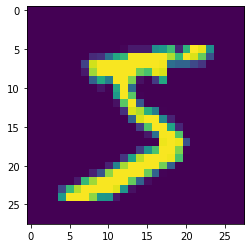

In [51]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [55]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [57]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation



In [0]:
# #from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
# model.summary()

In [0]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)             

In [0]:
# # Original 
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 3,3, activation='relu')) # Added
# model.add(Convolution2D(10, 3,3, activation='relu')) # Added  
# model.add(Convolution2D(10, 1, activation='relu'))
# #model.add(Convolution2D(10, 3,3, activation='relu'))
# #model.add(Convolution2D(10, 1, activation='relu')) # Added 
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
# model.summary()


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [86]:
model.fit(X_train, Y_train, batch_size=16, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.1872 - acc: 0.9444
Epoch 2/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.0823 - acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.0641 - acc: 0.9816
Epoch 4/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0530 - acc: 0.9841
Epoch 5/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.0436 - acc: 0.9865
Epoch 6/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0393 - acc: 0.9880
Epoch 7/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.0355 - acc: 0.9893
Epoch 8/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.0303 - acc: 0.9902
Epoch 9/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.0298 - acc: 0.9914
Epoch 10/20
60000/60000 [==============================] - 19s 322us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [96]:
print(score)

[0.03684927592134036, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [90]:
print(y_pred[:9])
print(y_test[:9])

[[2.52913348e-20 1.24770494e-15 1.25275745e-12 1.81573610e-11
  5.66973890e-20 3.18664248e-19 1.37214327e-26 1.00000000e+00
  3.12775167e-18 5.55479545e-13]
 [2.67971622e-21 2.75718508e-14 1.00000000e+00 2.47899942e-17
  3.55790689e-23 1.45944622e-27 8.17456029e-18 2.16822311e-20
  6.32331305e-20 6.52268133e-31]
 [1.20201040e-20 1.00000000e+00 6.02605751e-15 1.82916103e-18
  1.10872433e-12 6.21376170e-16 2.24428664e-15 9.68347798e-13
  5.91960781e-16 3.51704544e-16]
 [9.99968410e-01 1.06805516e-10 4.07270884e-09 4.16513525e-12
  2.30996555e-09 4.97447583e-10 3.14537901e-05 2.43095633e-09
  3.38190631e-08 5.71341836e-08]
 [4.21432764e-18 2.99987493e-13 7.32617797e-13 5.64657785e-20
  9.99999762e-01 1.16621826e-15 1.21979766e-14 4.16951575e-13
  5.13454351e-13 2.11342353e-07]
 [1.25812345e-16 1.00000000e+00 2.59428156e-12 7.06309646e-15
  2.49684457e-11 2.23351780e-14 1.04902998e-13 4.20541657e-10
  5.33721830e-13 1.74789491e-12]
 [5.70389727e-23 4.57314511e-14 1.77103240e-17 1.68767750e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

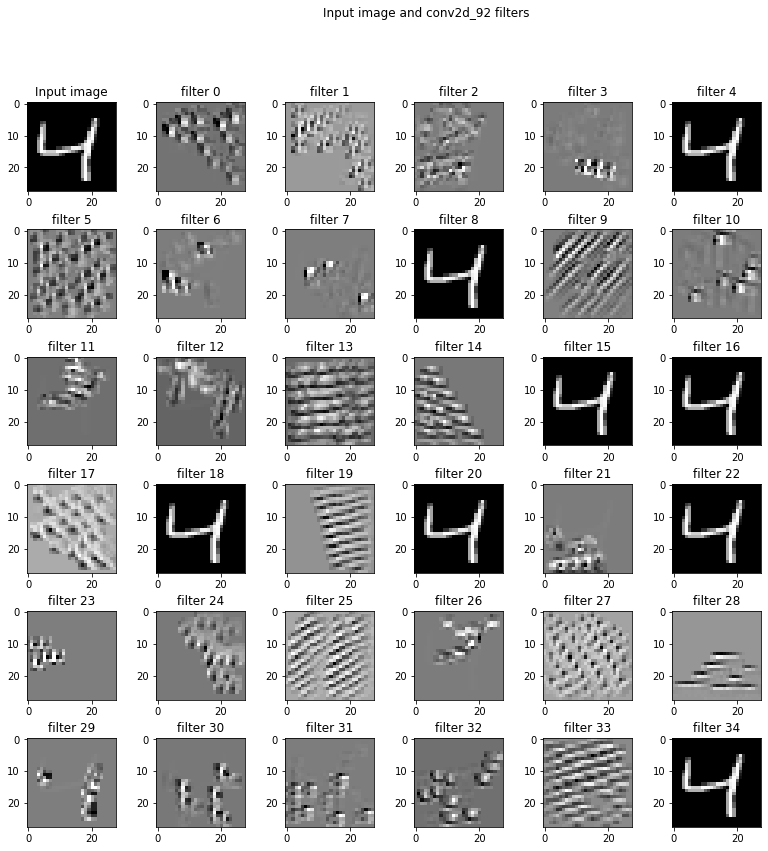

In [94]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_92'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()